In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [18]:
airbnb = pd.read_csv("nyc_airbnb_2019.csv")
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [19]:
airbnb.shape

(48895, 16)

* There are 16 missing values for the name of the listings. 
* There are 10,052 missing values for both __latest reviews__ and __reviews per month__.

In [16]:
columns = airbnb.columns
num_nulls = []

for column in columns:
    num_null = sum(airbnb[column].isnull())
    num_nulls.append(num_null)

num_nulls = pd.Series(num_nulls)

null_dfr = pd.DataFrame([columns,num_nulls])
null_dfr

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,0,16,0,21,0,0,0,0,0,0,0,0,10052,10052,0,0


The four distribution plots are for __price__, __minimum nights__, __number of reviews__, and __reviews per month__.

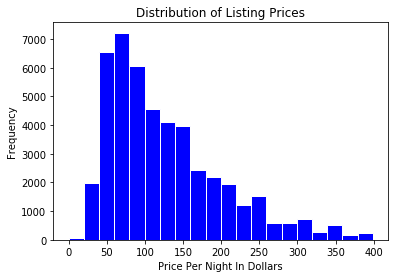

In [65]:
price_filter = airbnb["price"] < 400
airbnb[price_filter]["price"].hist(bins = 20, edgecolor = "white", grid = False, color = "b")
plt.title("Distribution of Listing Prices")
plt.xlabel("Price Per Night In Dollars")
plt.ylabel("Frequency")

os.mkdir("plots")
plt.savefig("plots/price_distribution.png")

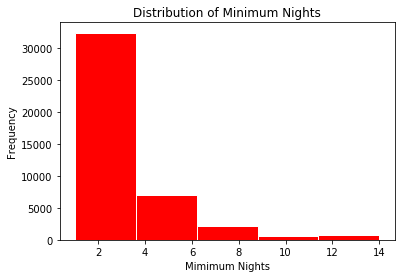

In [66]:
min_nights_filter = airbnb["minimum_nights"] < 15
airbnb[min_nights_filter]["minimum_nights"].hist(bins = 5,edgecolor = "white", grid = False, color = "r")
plt.title("Distribution of Minimum Nights")
plt.xlabel("Mimimum Nights")
plt.ylabel("Frequency")

plt.savefig("plots/minimum_nights_distribution.png")

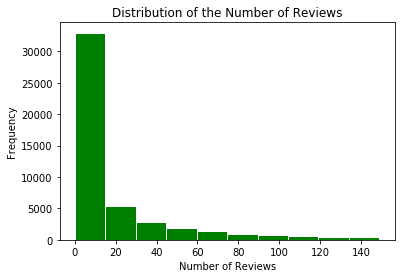

In [67]:
num_reviews_filter = airbnb["number_of_reviews"] < 150
airbnb[num_reviews_filter]["number_of_reviews"].hist(edgecolor = "white", grid = False, color = "g")
plt.title("Distribution of the Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Frequency")

plt.savefig("plots/review_distribution.png")

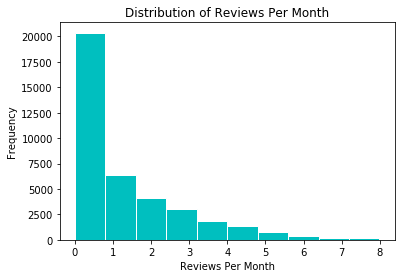

In [68]:
reviews_per_month_filter = airbnb["reviews_per_month"] < 8
airbnb[reviews_per_month_filter]["reviews_per_month"].hist(edgecolor = "white", grid = False, color = "c")
plt.title("Distribution of Reviews Per Month")
plt.xlabel("Reviews Per Month")
plt.ylabel("Frequency")

plt.savefig("plots/reviews_per_month.png")